NMML PROJECT 2:ec016.674.res.2

Mean Firing Rate: 0.29858622 spikes per second
Mean Firing Rate: 0.2270398 spikes per second
Mean Firing Rate: 0.24003085 spikes per second
Mean Firing Rate: 0.28121802 spikes per second
Mean Firing Rate: 0.79327226 spikes per second
Mean Firing Rate: 0.585013 spikes per second
Mean Firing Rate: 0.32128203 spikes per second
Mean Firing Rate: 0.318674 spikes per second
Mean Firing Rate: 0.29107594 spikes per second
Mean Firing Rate: 0.42172208 spikes per second
Mean Firing Rate: 0.33527684 spikes per second
Mean Firing Rate: 0.28461146 spikes per second
Mean Firing Rate: 0.39422047 spikes per second
Mean Firing Rate: 0.6948748 spikes per second


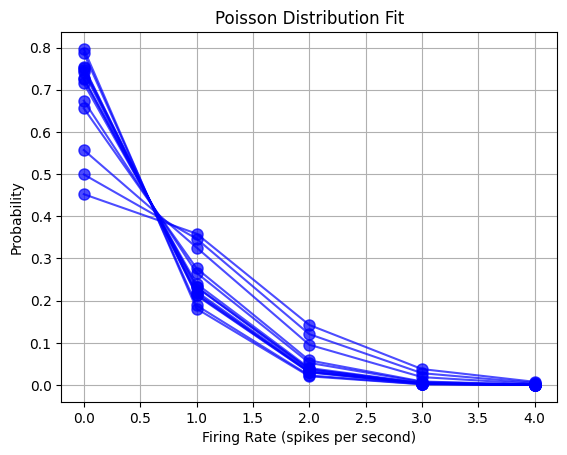

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

file_path = '/content/ec016.674.res.2'

#parameters
sampling_rate = 20000  # 20 kHz
time_step = 0.05  # in ms
time_step_seconds = time_step * 1e-3  # convert to seconds

# load file and process data in chunks (without chunking, I was having issues with crashing)
with open(file_path, 'rb') as file:  #'rb' for binary mode
    while True:
        chunk = np.fromfile(file, dtype=np.float32, count=10000)
        if chunk.size == 0:
            break  # exit the loop if end of file is reached

        # =firing rate for the current chunk
        firing_rate_chunk = chunk / time_step_seconds

        # analysis on the chunk
        mean_firing_rate = np.mean(firing_rate_chunk)
        print("Mean Firing Rate:", mean_firing_rate, "spikes per second")

        # fit the Poisson distribution
        poisson_dist = poisson(mean_firing_rate)

        # generate the Poisson probability mass function
        x = np.arange(0, np.max(firing_rate_chunk) + 1)
        pmf = poisson_dist.pmf(x)

        # plot the firing rate over time for the current chunk
        plt.plot(x, pmf, 'bo-', ms=8, label='Poisson PMF', alpha=0.7)

# plot labels and details
plt.xlabel('Firing Rate (spikes per second)')
plt.ylabel('Probability')
plt.title('Poisson Distribution Fit')
plt.grid(True)
plt.show()


Mean Firing Rate: 4.904 spikes per second


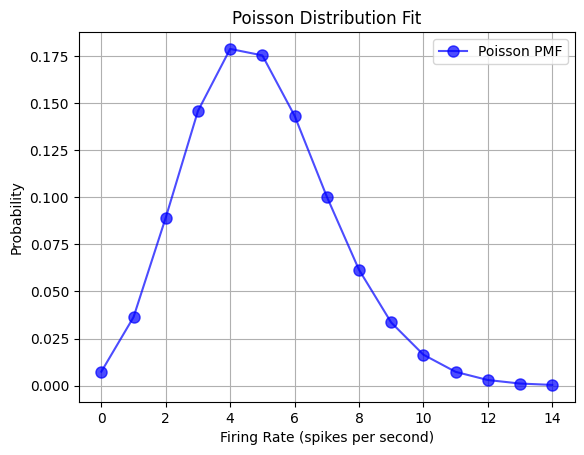

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# parameters
lambda_param = 5  # mean parameter for Poisson distribution
num_samples = 1000  # quantity of samples

# generate firing rate data using Poisson distribution
firing_rate_data = np.random.poisson(lambda_param, num_samples)

# calculate mean firing rate
mean_firing_rate = np.mean(firing_rate_data)
print("Mean Firing Rate:", mean_firing_rate, "spikes per second")

# fit to Poisson distribution
poisson_dist = poisson(mean_firing_rate)

# poisson probability mass function
x = np.arange(0, np.max(firing_rate_data) + 1)
pmf = poisson_dist.pmf(x)

# plot the firing rate over time
plt.plot(x, pmf, 'bo-', ms=8, label='Poisson PMF', alpha=0.7)

# plot labels and details
plt.xlabel('Firing Rate (spikes per second)')
plt.ylabel('Probability')
plt.title('Poisson Distribution Fit')
plt.grid(True)
plt.legend()
plt.show()


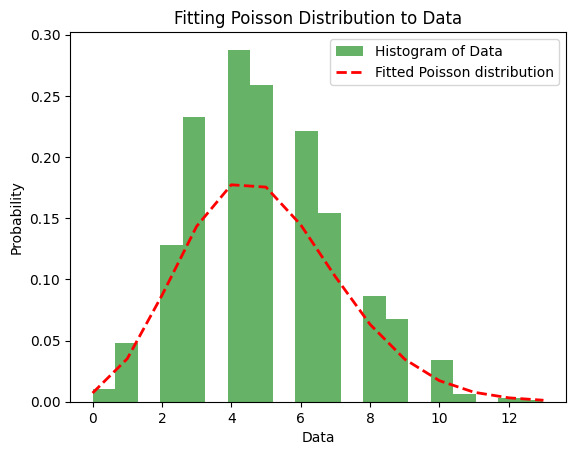

MLE parameter for Poisson distribution: 4.9469999307005725


In [45]:
from scipy.optimize import minimize
from scipy.stats import poisson
import numpy as np
import matplotlib.pyplot as plt

# sample data
np.random.seed(0)
data = np.random.poisson(5, 1000)

# negative log-likelihood function for the Poisson distribution
def neg_log_likelihood(mu, data):
    return -np.sum(poisson.logpmf(data, mu))

# Maximum Likelihood Estimation (MLE) to fit the Poisson distribution
result = minimize(neg_log_likelihood,  # function to minimize
                  x0=1.0,             # initial guess for the parameter
                  args=(data,),       # additional arguments to the function
                  method='L-BFGS-B')  # optimization method

# extract  MLE parameter for Poisson distribution
poisson_param = result.x[0]

# histogram of data and the fitted Poisson distribution
plt.hist(data, bins=20, density=True, alpha=0.6, color='g', label='Histogram of Data')
x = np.arange(0, max(data) + 1)
plt.plot(x, poisson.pmf(x, poisson_param), 'r--', lw=2, label='Fitted Poisson distribution')
plt.xlabel('Data')
plt.ylabel('Probability')
plt.title('Fitting Poisson Distribution to Data')
plt.legend()
plt.show()

print("MLE parameter for Poisson distribution:", poisson_param)


